In [2]:
%%bash
# wandb login b8fc6444c557ec17b4ec20995fa0881ce17393bf
# pip install pandas-profiling
pip install pydantic ydata-profiling ipywidgets

In [3]:
%matplotlib inline

In [4]:
import wandb
import pandas as pd

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: khoalang (khoalang-personal). Use `wandb login --relogin` to force relogin


In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/envs/mlflow-e4fcefd643ef1ee947cfeff48521954cf08a16aa/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/opt/conda/envs/mlflow-e4fcefd643ef1ee947cfeff48521954cf08a16aa/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
/opt/conda/envs/mlflow-e4fcefd643ef1ee947cfeff48521954cf08a16aa/lib/python3.10/site-packages/ydata_profiling/model/typeset_relations.py:34: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdt.is_categorical_dtype(series):
/opt/conda/envs/mlflow-e

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

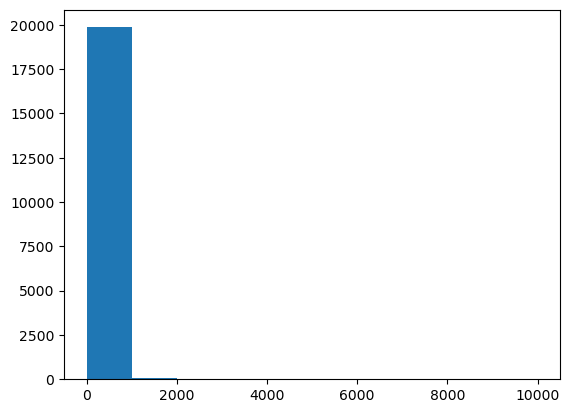

In [6]:
import matplotlib.pyplot as plt

plot = df['price']
# list(plot)
plt.hist(list(plot))
plt.show()

In [7]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  number_

In [9]:
run.finish()